# Implement 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_circles

/home/vinh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# init XOR data 
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

#init circle data
X_circle,y_circle = make_circles(100, factor=0.2, noise=0.1) 

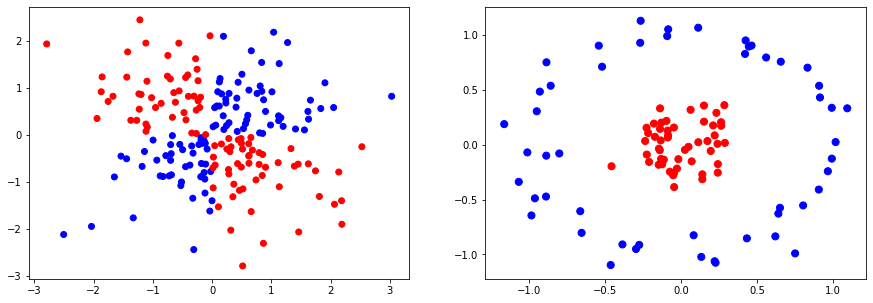

In [3]:
# plot 
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap='bwr')
ax[1].scatter(X_circle[:,0],X_circle[:,1], c=y_circle, s=50, cmap='bwr')

plt.show()

In [4]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [5]:
from sklearn.svm import SVC

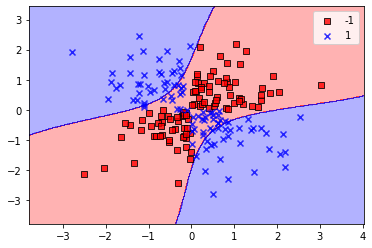

In [6]:
## rbf, xor data
svc_rbf = SVC(kernel='rbf', gamma=0.1)
svc_rbf.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svc_rbf)
plt.legend(loc='best')
plt.show()

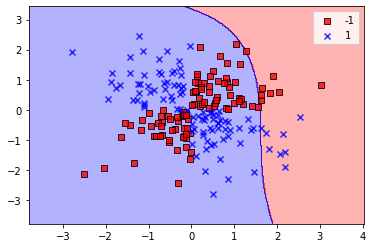

In [7]:
## poly, xor data
svc_poly = SVC(kernel='poly', degree=3, gamma=0.1, coef0=0.0)
svc_poly.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svc_poly)
plt.legend(loc='best')
plt.show()

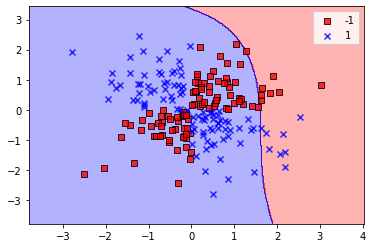

In [8]:
## sigmoid, xor data
svc_sigmoid = SVC(kernel='sigmoid', gamma=0.1,  coef0=0.0)
svc_sigmoid.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svc_poly)
plt.legend(loc='best')
plt.show()

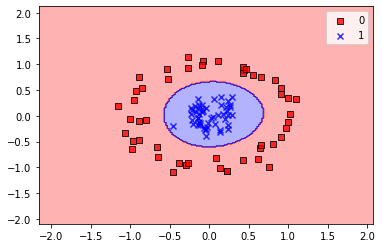

In [9]:
## rbf, circle data
svc_rbf = SVC(kernel='rbf', gamma=1)
svc_rbf.fit(X_circle, y_circle)
plot_decision_regions(X_circle, y_circle, classifier=svc_rbf)
plt.legend(loc='best')
plt.show()

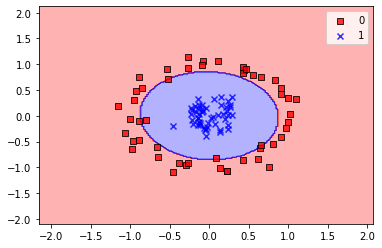

In [10]:
## poly, circle data
svc_poly = SVC(kernel='poly', degree=2, gamma=0.1, coef0=0.0)
svc_poly.fit(X_circle, y_circle)
plot_decision_regions(X_circle, y_circle, classifier=svc_poly)
plt.legend(loc='best')
plt.show()

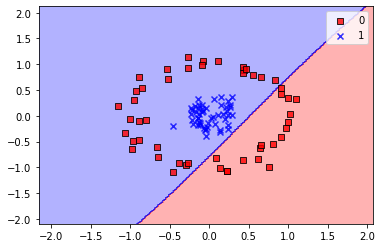

In [11]:
## sigmoid, circle data
svc_sigmoid = SVC(kernel='sigmoid', gamma=0.1,  coef0=0.0)
svc_sigmoid.fit(X_circle, y_circle)
plot_decision_regions(X_circle, y_circle, classifier=svc_sigmoid)
plt.legend(loc='best')
plt.show()